In [12]:
from scipy.stats import multivariate_normal
import math
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1500, cluster_std=[1.0, 3.5, 0.5], random_state=42)

#define basic params
m, n = X.shape
K = 3
max_iter = 20
old = 0

#==initialization==

#responsibliity
r = np.full(shape=(m, K), fill_value=1/K)

#pi
pi = np.full((K, ), fill_value=1/K) #simply use 1/k for pi
print(X.shape)
#mean
random_row = np.random.randint(low=0, high=m, size=K)
# print(random_row)
mean = np.array([X[idx,:] for idx in random_row ]).T #.T to make to shape (M, K)
print(mean)

#covariance
cov = np.array([np.cov(X.T) for _ in range (K)])
print(cov.shape)

(1500, 2)
[[-1.43556587 -6.63850271 -6.90238331]
 [ 7.98777083 -7.4989408  -7.09222776]]
(3, 2, 2)


New smaller?  -37136.707545634694
New difference:  37136.707545634694
New smaller?  -139454.78864565486
New difference:  38424.76485502839
New smaller?  -568974.9434959443
New difference:  10862.76571932272
New smaller?  -590222.9601765748
New difference:  8511.714484674274


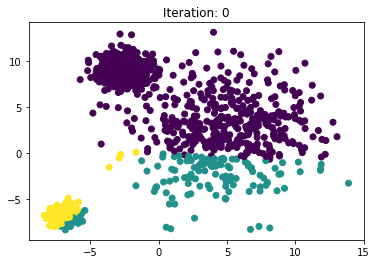

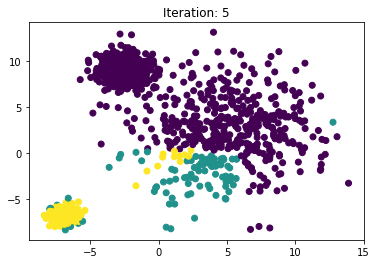

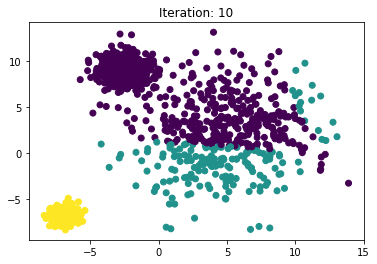

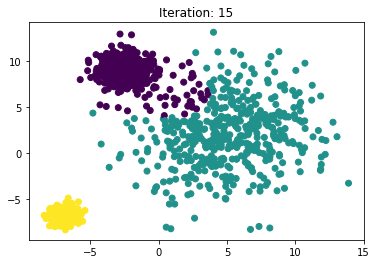

In [13]:
for iteration in range(max_iter):
    
    #===E-Step=====
    #Update r_ik of each sample
    for i in range(m):
        for k in range(K):
            xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:, k], cov=cov[k])
            r[i, k] = pi[k] * xi_pdf
        r[i] /= np.sum(r[i])

    New = 0
    for i in range(m):
        for k in range(K):
            New = New + math.log(pi[k])
            New = New + multivariate_normal.logpdf(
                X[i], mean=mean[:, k], cov=cov[k])
    
    if(iteration % 5 == 0):
        preds = np.argmax(r, axis=1)
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=preds)
        plt.title(f"Iteration: {iteration}")
        print("New smaller? ", New)
        print("New difference: ", math.fabs(New - old))
    
    if(math.fabs(New-old) < 5):
        print("Final New: ", New)
        print("final difference: ", math.fabs(New - old))
        break
    old = New
    
    #===M-Step====
    # Find NK first for latter use
    NK = np.sum(r, axis=0)
    assert NK.shape == (K, )
    
    #PI
    pi = NK / m
    assert pi.shape == (K, )
    
    #mean
    mean =  ( X.T @ r ) / NK
    assert mean.shape == (n, K)
    
    #covariance (also called Sigma)
    for k in range(K):
        for i in range(m):
            X_mean = (X[i]-mean[:, k]).reshape(-1, 1)
            cov[k] += r[i, k] * (X_mean @ X_mean.T)
        cov[k] /= NK[k]
    assert cov.shape == (K, n, n)
        

Text(0.5, 1.0, 'Final')

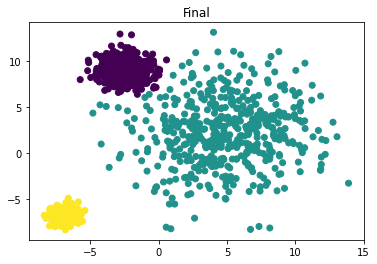

In [14]:
#get preds
yhat = np.argmax(r, axis=1)

#plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=yhat)
plt.title("Final")